In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns
%matplotlib inline 
import csv
from datetime import datetime
from lxml import html 
import requests
from bs4 import BeautifulSoup
import itertools
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from bokeh.plotting import figure, output_notebook, show   
output_notebook()
from datetime import datetime


Loading BokehJS ...

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import tarfile
import urllib
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### manerauno

In [4]:
df1=pd.read_csv("df_BACH__manerauno.csv")
col=df1.columns.tolist()[8:]
df1[col]

,days_left,Lengua,Mates,Ingles,Dibujo,Fisica,Historia,media_troncales,Biologia,Quimica,Mates_sociales,Economia,Geografia,tipo_bachillerato-Sanitario,tipo_bachillerato-Sociales,tipo_bachillerato-Tecnologico
0,34,7.75,6.24,10.00,4.90,7.74,5.09,6.95,NaN,NaN,NaN,NaN,NaN,0,0,1
1,15,6.89,4.98,8.52,6.24,5.08,5.38,6.18,NaN,NaN,NaN,NaN,NaN,0,0,1
2,16,9.35,7.02,4.43,5.83,5.56,8.82,6.83,NaN,NaN,NaN,NaN,NaN,0,0,1
3,29,5.49,8.94,5.00,9.12,5.34,9.34,7.21,NaN,NaN,NaN,NaN,NaN,0,0,1
4,29,8.38,8.87,6.76,6.44,10.00,4.85,7.55,NaN,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,22,8.71,NaN,8.15,NaN,NaN,8.09,6.84,NaN,NaN,5.97,5.14,4.98,0,1,0
5996,21,5.15,NaN,6.47,NaN,NaN,6.50,7.02,NaN,NaN,7.97,6.94,9.06,0,1,0
5997,24,7.81,NaN,7.00,NaN,NaN,6.18,6.12,NaN,NaN,5.20,4.90,5.64,0,1,0
5998,18,5.32,NaN,6.80,NaN,NaN,5.44,7.67,NaN,NaN,9.90,9.10,9.48,0,1,0


In [169]:
dfpca=pd.read_csv("manera1_modelo3_kmeans22_pca1.csv")
dfpca.head(3)

,0,predicted_cluster
0,-0.605663,20
1,-0.539307,14
2,-0.609482,20


In [170]:
df1["cluster"]=dfpca["predicted_cluster"]#modficar

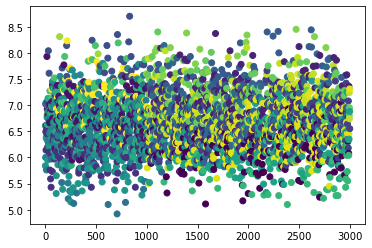

In [171]:
dft=pd.concat([df1[df1["tipo_bachillerato-Sociales"]==1].head(1000),df1[df1["tipo_bachillerato-Sanitario"]==1].head(1000),df1[df1["tipo_bachillerato-Tecnologico"]==1].head(1000)])
dft.index=range(1,len(dft)+1)
plt.scatter(dft.index.values.tolist(),dft["media_troncales"].values.tolist(),c=dft["cluster"].values.tolist())

In [21]:
## ver propiedades de los clusteres creados

In [172]:
df1["tipo_bachillerato"]=df2["tipo_bachillerato"]

In [32]:
dx1 = df1.groupby(["tipo_bachillerato","cluster"]).size().reset_index(name='Count')#conteo groupby de dataframe, ValueCounts, valores unicos
#dx1[["cluster"]] = dx1[["cluster"]].astype(str)#ordena valores unicos de menor a mayor año
dx1=dx1.sort_values(by=["Count"],ascending=True)#	1896	GER	261 	1896	USA	151 si false hace lo contrario empieza por el 2016 y va bajando
dx1.index=range(1,len(dx1)+1)
dx1

,tipo_bachillerato,cluster,Count
1,3,10,15
2,1,17,56
3,2,17,58
4,3,11,74
5,2,0,98
6,1,0,107
7,2,6,128
8,1,6,138
9,3,4,180
10,3,3,182


## CIENCIAS

In [159]:
dft=df1[df1["tipo_bachillerato"]!=3]
dft[dft["cluster"]==0][dft[dft["cluster"]==0]["tipo_bachillerato"]==1]["days_left"].mean()

23.626168224299064

In [180]:
dft=df1[df1["tipo_bachillerato"]!=3]
dx1 = dft.groupby(["cluster"]).size().reset_index(name='Count')#conteo groupby de dataframe, ValueCounts, valores unicos
#dx1[["cluster"]] = dx1[["cluster"]].astype(str)#ordena valores unicos de menor a mayor año
dx1=dx1.sort_values(by=["cluster"],ascending=True)#	1896	GER	261 	1896	USA	151 si false hace lo contrario empieza por el 2016 y va bajando
dx1.index=range(1,len(dx1)+1)
dx1


,cluster,Count
1,0,355
2,2,365
3,4,547
4,6,157
5,7,521
6,12,466
7,14,200
8,16,333
9,17,65
10,19,435


In [189]:
medias_GeneralCIENCIAS1=[]
medias_LenguaCIENCIAS1=[]
medias_MatesCIENCIAS1=[]
medias_InglesCIENCIAS1=[]
medias_FisicaCIENCIAS1=[]
medias_DibujoCIENCIAS1=[]
medias_HistoriaCIENCIAS1=[]
medias_GeneralCIENCIAS2=[]
medias_LenguaCIENCIAS2=[]
medias_MatesCIENCIAS2=[]
medias_InglesCIENCIAS2=[]
medias_QuimicaCIENCIAS2=[]
medias_BiologiaCIENCIAS2=[]
medias_HistoriaCIENCIAS2=[]
daysleft1=[]
daysleft2=[]
cluster=[]
bachillerato=[]
for i,pos in enumerate(dx1["cluster"].values.tolist()):#valores unicos de cluster ordenados de menor a mayor
    cluster.append(pos)
    
    for i2 in range(1,3):
        if i2 == 1:
            #daysleft1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["days_left"].mean())
            bachillerato.append(i2)
            medias_GeneralCIENCIAS1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["media_troncales"].mean())
            medias_LenguaCIENCIAS1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Lengua"].mean())
            medias_MatesCIENCIAS1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Mates"].mean())
            medias_InglesCIENCIAS1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Ingles"].mean())
            medias_FisicaCIENCIAS1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Fisica"].mean())
            medias_DibujoCIENCIAS1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Dibujo"].mean())
            medias_HistoriaCIENCIAS1.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Historia"].mean())
        elif i2==2:
            #daysleft2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["days_left"].mean())
            bachillerato.append(i2)
            medias_GeneralCIENCIAS2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["media_troncales"].mean())
            medias_LenguaCIENCIAS2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Lengua"].mean())
            medias_MatesCIENCIAS2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Mates"].mean())
            medias_InglesCIENCIAS2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Ingles"].mean())
            medias_BiologiaCIENCIAS2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Biologia"].mean())
            medias_QuimicaCIENCIAS2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Quimica"].mean())
            medias_HistoriaCIENCIAS2.append(dft[dft["cluster"]==pos][dft[dft["cluster"]==pos]["tipo_bachillerato"]==i2]["Historia"].mean())



In [190]:
dft=df1[df1["tipo_bachillerato"]!=3]
dx1 = dft.groupby(["tipo_bachillerato","cluster"]).size().reset_index(name='Count')#conteo groupby de dataframe, ValueCounts, valores unicos
#dx1[["cluster"]] = dx1[["cluster"]].astype(str)#ordena valores unicos de menor a mayor año
dx1=dx1.sort_values(by=["cluster"],ascending=True)#	1896	GER	261 	1896	USA	151 si false hace lo contrario empieza por el 2016 y va bajando
dx1.index=range(1,len(dx1)+1)
dx1=dx1[dx1["tipo_bachillerato"]==1]
dx1

,tipo_bachillerato,cluster,Count
1,1,0,233
3,1,2,142
5,1,4,271
7,1,6,48
9,1,7,231
11,1,12,275
13,1,14,163
15,1,16,126
18,1,17,9
20,1,19,186


In [191]:
dfTecnologico = pd.DataFrame(
    {'cluster': cluster,
     'Global_Mean': medias_GeneralCIENCIAS1,
     'MediaLengua': medias_LenguaCIENCIAS1,
     'Media_Mates': medias_MatesCIENCIAS1,
     'Media_Ingles': medias_InglesCIENCIAS1,
     'Media_Fisica': medias_FisicaCIENCIAS1,
     'Media_Dibujo': medias_DibujoCIENCIAS1,
     'Media_Historia': medias_HistoriaCIENCIAS1,
     #'Media_days_left1': daysleft1,
    })
dfTecnologico = pd.merge(dfTecnologico, dx1, on=["cluster"])

dfTecnologico=dfTecnologico.sort_values(by=["Global_Mean"],ascending=False)
dfTecnologico.index=range(1,len(dfTecnologico)+1)
dfTecnologico

,cluster,Global_Mean,MediaLengua,Media_Mates,Media_Ingles,Media_Fisica,Media_Dibujo,Media_Historia,tipo_bachillerato,Count
1,17,7.667778,6.728889,9.541111,6.177778,8.137778,8.855556,6.565556,1,9
2,6,7.567083,6.601667,8.971042,7.132083,7.698333,8.311250,6.688542,1,48
3,16,7.247381,6.461111,8.662143,6.861984,7.167302,7.734841,6.597302,1,126
4,2,7.081831,6.631901,8.177606,6.911127,7.050211,7.174648,6.542535,1,142
5,19,6.953226,6.592634,7.848011,6.941075,6.780538,6.864731,6.693387,1,186
6,7,6.864242,6.590823,7.174502,7.082381,6.740433,6.905152,6.693160,1,231
7,4,6.675830,6.504096,6.668782,6.974686,6.513764,6.907196,6.487712,1,271
8,20,6.589652,6.596392,6.126772,6.982310,6.430411,6.736139,6.666677,1,316
9,12,6.436182,6.631236,5.771927,7.094945,6.095091,6.487382,6.536255,1,275
10,0,6.237124,6.579485,5.350086,6.856781,5.921073,6.030472,6.684421,1,233


In [178]:
dfSanitario = pd.DataFrame(
    {'cluster': cluster,
     'Global_Mean': medias_GeneralCIENCIAS2,
     'MediaLengua': medias_LenguaCIENCIAS2,
     'Media_Mates': medias_MatesCIENCIAS2,
     'Media_Ingles': medias_InglesCIENCIAS2,
     'Media_Quimica': medias_QuimicaCIENCIAS2,
     'Media_Biologia': medias_BiologiaCIENCIAS2,
     'Media_Historia': medias_HistoriaCIENCIAS2,
    })
dfSanitario = pd.merge(dfSanitario, dx1, on=["cluster"])

dfSanitario=dfSanitario.sort_values(by=["Global_Mean"],ascending=False)
dfSanitario.index=range(1,len(dfSanitario)+1)
dfSanitario

,cluster,Global_Mean,MediaLengua,Media_Mates,Media_Ingles,Media_Quimica,Media_Biologia,Media_Historia,tipo_bachillerato,Count
1,17,7.629464,6.779286,9.144643,6.941786,8.273214,7.902857,6.738036,2,56
2,6,7.297615,6.608073,8.666147,6.889358,7.305138,7.602569,6.715321,2,109
3,16,7.200145,6.553527,7.890193,7.197536,7.318986,7.428696,6.812077,2,207
4,2,7.018520,6.869462,7.386188,6.926413,7.212691,6.993229,6.722735,2,223
5,19,6.846345,6.542811,6.908514,6.953414,6.900442,6.970000,6.801968,2,249
6,7,6.729000,6.670069,6.430483,7.076483,6.827828,6.746034,6.624241,2,290
7,4,6.573406,6.708261,5.946159,6.982717,6.510761,6.749493,6.542971,2,276
8,20,6.417792,6.588792,5.646125,7.033833,6.188500,6.469333,6.581208,2,240
9,12,6.214450,6.525550,5.324084,6.829424,6.081047,5.910419,6.616126,2,191
10,0,6.017869,6.410492,5.016148,6.937869,5.547049,5.644344,6.550492,2,122


In [181]:
df3 = pd.concat((dfTecnologico, dfSanitario))
xc=(df3.groupby(['cluster'])
   ["Global_Mean","MediaLengua","Media_Mates","Media_Ingles","Media_Quimica","Media_Biologia","Media_Dibujo","Media_Fisica","Media_Historia"]
   .agg(['mean'])
   .reset_index()
   .values
   .tolist())
dx= pd.DataFrame(np.asarray(xc).reshape(-1,10))
dx.index=range(1,len(dx)+1)
dx.columns=["cluster","Global_Mean","MediaLengua","Media_Mates","Media_Ingles","Media_Quimica","Media_Biologia","Media_Dibujo","Media_Fisica","Media_Historia"]
dx["Count"]=dx1["Count"].values.tolist()#dx1 ejecutado de nuevo arriba el del principio

dx=dx.sort_values(by=["Global_Mean"],ascending=False)
dx.index=range(1,len(dx)+1)

dx

<ipython-input-181-c5d1e7675c2f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  xc=(df3.groupby(['cluster'])


,cluster,Global_Mean,MediaLengua,Media_Mates,Media_Ingles,Media_Quimica,Media_Biologia,Media_Dibujo,Media_Fisica,Media_Historia,Count
1,17.0,7.648621,6.754087,9.342877,6.559782,8.273214,7.902857,8.855556,8.137778,6.651796,65
2,6.0,7.432349,6.604870,8.818594,7.010721,7.305138,7.602569,8.311250,7.698333,6.701931,157
3,16.0,7.223763,6.507319,8.276168,7.029760,7.318986,7.428696,7.734841,7.167302,6.704689,333
4,2.0,7.050176,6.750682,7.781897,6.918770,7.212691,6.993229,7.174648,7.050211,6.632635,365
5,19.0,6.899786,6.567723,7.378262,6.947244,6.900442,6.970000,6.864731,6.780538,6.747677,435
6,7.0,6.796621,6.630446,6.802492,7.079432,6.827828,6.746034,6.905152,6.740433,6.658701,521
7,4.0,6.624618,6.606178,6.307471,6.978702,6.510761,6.749493,6.907196,6.513764,6.515342,547
8,20.0,6.503722,6.592592,5.886449,7.008072,6.188500,6.469333,6.736139,6.430411,6.623943,556
9,12.0,6.325316,6.578393,5.548006,6.962185,6.081047,5.910419,6.487382,6.095091,6.576190,466
10,0.0,6.127497,6.494988,5.183117,6.897325,5.547049,5.644344,6.030472,5.921073,6.617456,355


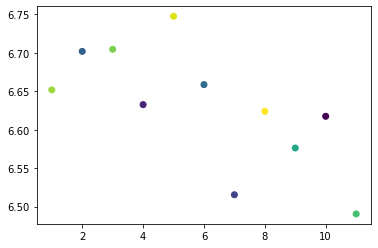

In [193]:
plt.scatter(dx.index.values.tolist(),dx["Media_Historia"].values.tolist(),c=dx["cluster"].values.tolist())

## sociales

In [183]:
dft=df1[df1["tipo_bachillerato"]==3]
dx1 = dft.groupby(["tipo_bachillerato","cluster"]).size().reset_index(name='Count')#conteo groupby de dataframe, ValueCounts, valores unicos
#dx1[["cluster"]] = dx1[["cluster"]].astype(str)#ordena valores unicos de menor a mayor año
dx1=dx1.sort_values(by=["cluster"],ascending=True)#	1896	GER	261 	1896	USA	151 si false hace lo contrario empieza por el 2016 y va bajando
dx1.index=range(1,len(dx1)+1)
dx1


,tipo_bachillerato,cluster,Count
1,3,1,274
2,3,3,271
3,3,5,71
4,3,8,50
5,3,9,332
6,3,10,210
7,3,11,174
8,3,13,313
9,3,15,131
10,3,18,15


In [184]:
medias_GeneralSOCIALES=[]
medias_LenguaSOCIALES=[]
medias_MatesSOCIALES=[]
medias_InglesSOCIALES=[]
medias_EconomiaSOCIALES=[]
medias_GeografiaSOCIALES=[]
medias_HistoriaSOCIALES=[]
cluster=[]
for i,pos in enumerate(dx1["cluster"].values.tolist()):#va del año mas bajo al mas alto, cogiendo los 5 pts mas altos
    cluster.append(pos)
    medias_GeneralSOCIALES.append(dft[dft["cluster"]==pos]["media_troncales"].mean())
    medias_LenguaSOCIALES.append(dft[dft["cluster"]==pos]["Lengua"].mean())
    medias_MatesSOCIALES.append(dft[dft["cluster"]==pos]["Mates_sociales"].mean())
    medias_InglesSOCIALES.append(dft[dft["cluster"]==pos]["Ingles"].mean())
    medias_EconomiaSOCIALES.append(dft[dft["cluster"]==pos]["Economia"].mean())
    medias_GeografiaSOCIALES.append(dft[dft["cluster"]==pos]["Geografia"].mean())
    medias_HistoriaSOCIALES.append(dft[dft["cluster"]==pos]["Historia"].mean())
    
dfSOCIALES = pd.DataFrame(
    {'cluster': cluster,
     'Global_Mean': medias_GeneralSOCIALES,
     'MediaLengua': medias_LenguaSOCIALES,
     'Media_Mates': medias_MatesSOCIALES,
     'Media_Ingles': medias_InglesSOCIALES,
     'Media_Economia': medias_EconomiaSOCIALES,
     'Media_Geografia': medias_GeografiaSOCIALES,
     'Media_Historia': medias_HistoriaSOCIALES,
    })

dfSOCIALES = pd.merge(dfSOCIALES, dx1, on=["cluster"])
dfSOCIALES.sort_values(by=["Global_Mean"],ascending=False)

,cluster,Global_Mean,MediaLengua,Media_Mates,Media_Ingles,Media_Economia,Media_Geografia,Media_Historia,tipo_bachillerato,Count
9,18,7.821333,6.415333,8.884667,6.458667,9.343333,9.029333,6.802000,3,15
2,5,7.537746,6.680000,8.300704,7.003380,8.299718,8.430282,6.510704,3,71
8,15,7.238626,6.433740,7.737710,6.815802,7.754580,8.001603,6.690000,3,131
10,21,7.135409,6.657736,7.294843,7.029182,7.540692,7.664528,6.624969,3,159
5,10,6.966571,6.589571,7.112048,6.837524,7.338667,7.165429,6.756000,3,210
0,1,6.780657,6.515730,6.810219,6.916715,7.014234,6.864489,6.561387,3,274
7,13,6.640000,6.488275,6.485911,6.979840,6.599137,6.655974,6.631917,3,313
4,9,6.499036,6.641235,6.147741,6.942922,6.333072,6.248343,6.680602,3,332
1,3,6.308708,6.617491,5.896642,6.921513,5.853801,5.908229,6.652952,3,271
6,11,6.076494,6.583218,5.447644,6.959138,5.570920,5.399655,6.500632,3,174


### manerados

In [23]:
df2=pd.read_csv("df_BACH__manerados.csv")
df2

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,...,Dibujo,Fisica,Historia,media_troncales,Biologia,Quimica,Mates_sociales,Economia,Geografia,tipo_bachillerato
0,2021,5,6,11,0,20210506,2021-05-06 11:00:00,2021-06-10,34,7.75,...,4.90,7.74,5.09,6.95,NaN,NaN,NaN,NaN,NaN,1
1,2021,5,21,9,0,20210521,2021-05-21 09:00:00,2021-06-06,15,6.89,...,6.24,5.08,5.38,6.18,NaN,NaN,NaN,NaN,NaN,1
2,2021,5,17,11,45,20210517,2021-05-17 11:45:00,2021-06-03,16,9.35,...,5.83,5.56,8.82,6.83,NaN,NaN,NaN,NaN,NaN,1
3,2021,5,7,10,30,20210507,2021-05-07 10:30:00,2021-06-06,29,5.49,...,9.12,5.34,9.34,7.21,NaN,NaN,NaN,NaN,NaN,1
4,2021,5,10,12,0,20210510,2021-05-10 12:00:00,2021-06-09,29,8.38,...,6.44,10.00,4.85,7.55,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2021,5,16,11,30,20210516,2021-05-16 11:30:00,2021-06-08 00:00:00,22,8.71,...,NaN,NaN,8.09,6.84,NaN,NaN,5.97,5.14,4.98,3
5996,2021,5,15,11,15,20210515,2021-05-15 11:15:00,2021-06-06 00:00:00,21,5.15,...,NaN,NaN,6.50,7.02,NaN,NaN,7.97,6.94,9.06,3
5997,2021,5,11,12,30,20210511,2021-05-11 12:30:00,2021-06-05 00:00:00,24,7.81,...,NaN,NaN,6.18,6.12,NaN,NaN,5.20,4.90,5.64,3
5998,2021,5,17,8,30,20210517,2021-05-17 08:30:00,2021-06-05 00:00:00,18,5.32,...,NaN,NaN,5.44,7.67,NaN,NaN,9.90,9.10,9.48,3


In [18]:
dfpca=pd.read_csv("manera2_modelo1_kmeans15_pca1.csv")
dfpca.head(3)

,0,predicted_cluster
0,-0.766041,13
1,-0.643460,12
2,-0.722864,3


In [19]:
df2["cluster"]=dfpca["predicted_cluster"]#modficar

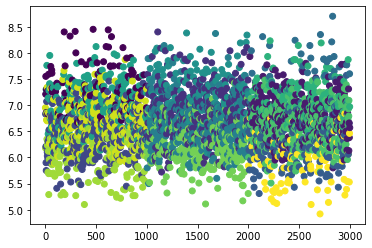

In [20]:
dft=pd.concat([df2[df2["tipo_bachillerato"]==1].head(1000),df2[df2["tipo_bachillerato"]==2].head(1000),df2[df2["tipo_bachillerato"]==3].head(1000)])
dft.index=range(1,len(dft)+1)
plt.scatter(dft.index.values.tolist(),dft["media_troncales"].values.tolist(),c=dft["cluster"].values.tolist())

### maneratres

In [8]:
df3=pd.read_csv("df_BACH__maneratres.csv")
df3

,año,mes,dia,hora,min,dateInt,Date_start_horario,Date_start_Examenes,days_left,Lengua,...,Ingles,Dibujo,Fisica,Historia,media_troncales,Biologia,Quimica,Mates_sociales,Economia,Geografia
0,2021,5,6,11,0,20210506,2021-05-06 11:00:00,2021-06-10,34,7.75,...,10.00,4.90,7.74,5.09,6.95,NaN,NaN,NaN,NaN,NaN
1,2021,5,21,9,0,20210521,2021-05-21 09:00:00,2021-06-06,15,6.89,...,8.52,6.24,5.08,5.38,6.18,NaN,NaN,NaN,NaN,NaN
2,2021,5,17,11,45,20210517,2021-05-17 11:45:00,2021-06-03,16,9.35,...,4.43,5.83,5.56,8.82,6.83,NaN,NaN,NaN,NaN,NaN
3,2021,5,7,10,30,20210507,2021-05-07 10:30:00,2021-06-06,29,5.49,...,5.00,9.12,5.34,9.34,7.21,NaN,NaN,NaN,NaN,NaN
4,2021,5,10,12,0,20210510,2021-05-10 12:00:00,2021-06-09,29,8.38,...,6.76,6.44,10.00,4.85,7.55,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2021,5,16,11,30,20210516,2021-05-16 11:30:00,2021-06-08 00:00:00,22,8.71,...,8.15,NaN,NaN,8.09,6.84,NaN,NaN,5.97,5.14,4.98
5996,2021,5,15,11,15,20210515,2021-05-15 11:15:00,2021-06-06 00:00:00,21,5.15,...,6.47,NaN,NaN,6.50,7.02,NaN,NaN,7.97,6.94,9.06
5997,2021,5,11,12,30,20210511,2021-05-11 12:30:00,2021-06-05 00:00:00,24,7.81,...,7.00,NaN,NaN,6.18,6.12,NaN,NaN,5.20,4.90,5.64
5998,2021,5,17,8,30,20210517,2021-05-17 08:30:00,2021-06-05 00:00:00,18,5.32,...,6.80,NaN,NaN,5.44,7.67,NaN,NaN,9.90,9.10,9.48


In [9]:
dfpca=pd.read_csv("manera3_modelo1_kmeans23_pca1.csv")
dfpca.head(3)

,0,predicted_cluster
0,-0.483616,6
1,-0.361934,8
2,-0.455040,16


In [10]:
df3["cluster"]=dfpca["predicted_cluster"]#modficar

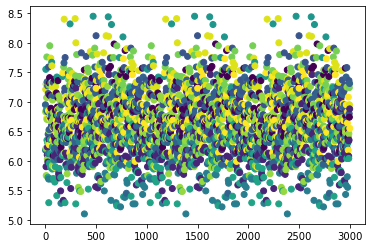

In [16]:
dft=pd.concat([df3[df3["Mates_sociales"]!=np.nan].head(1000),df3[df3["Quimica"]!=np.nan].head(1000),df3[df3["Fisica"]!=np.nan].head(1000)])

dft.index=range(1,len(dft)+1)
plt.scatter(dft.index.values.tolist(),dft["media_troncales"].values.tolist(),c=dft["cluster"].values.tolist())

In [39]:
#df[['from', 'to']] = np.sort(df[['from', 'to']], axis=1)#con esto hago unicos las parejas para que no influya el orden
xc=(dx1.groupby(['cluster'])
   .tipo_bachillerato
   .agg(['count'])
   .reset_index()
   .values
   .tolist())
dx= pd.DataFrame(np.asarray(xc).reshape(-1,2))
dx.sort_values(by=[1],ascending=False)

,0,1
0,0,2
6,6,2
16,16,2
13,13,2
12,12,2
7,7,2
17,17,2
5,5,2
2,2,2
8,8,1
